In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 파일 로드 (파일명 오타 주의: condtion)
with open('re_mse_metrics.json', 'r') as f:
    re_data = json.load(f)

with open('pre_re_mse_metrics.json', 'r') as f:
    pre_re_data = json.load(f)

# 데이터프레임 구성
plot_data = [
    {"Model": "Reaction+Pretreatment", "Metric": "RMSE", "Value": pre_re_data["RMSE"]},
    {"Model": "Reaction+Pretreatment", "Metric": "R2 Score", "Value": pre_re_data["R2"]},
    {"Model": "Only Reaction", "Metric": "RMSE", "Value": re_data["RMSE"]},
    {"Model": "Only Reaction", "Metric": "R2 Score", "Value": re_data["R2"]},

]
df = pd.DataFrame(plot_data)

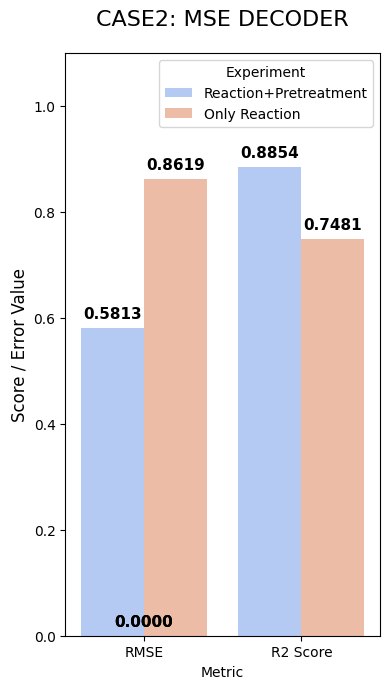

In [3]:

# plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(4, 7))

# 바 차트 생성
# 색상 전략: 기존(회색계열) vs 개선(녹색/파랑계열)
# palette = {"Reaction Cond.": "#AAB8BB", "Pre-Re Cond.": "#2ECC71"}
sns.barplot(data=df, x="Metric", y="Value", hue="Model",palette='coolwarm', ax=ax)

# 막대 위에 수치 라벨 추가
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.4f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                xytext=(0, 5), textcoords='offset points',
                fontsize=11, fontweight='bold')

# 그래프 디테일 설정
ax.set_title("CASE2: MSE DECODER", fontsize=16, pad=20)
ax.set_ylim(0, 1.1) # 지표들이 1 근처이므로 범위 고정
ax.set_ylabel("Score / Error Value", fontsize=12)
# ax.set_xlabel('')          # 'Metric' 글자 지우기
    # 'RMSE', 'R2 Score' 눈금 라벨 지우기
plt.legend(title="Experiment", loc='upper right')

plt.tight_layout()
plt.savefig('regression_comparison.png', dpi=300) # 고화질 저장
plt.show()